### This notebook addes a Housing Price Index dataset 1981-2024

- Raw File in data/raw/Housing Price Index 1981-2024.csv

- CSV file in data/processed/Housing Price Index 1981-2024.csv

- SQL: table Housing_Price_Index

In [15]:
import pandas as pd

# Load the CSV file
file_path = '../data/raw/Housing Price Index 1981-2024.csv'
df = pd.read_csv(file_path)

# Replace missing values ('..' or 'x') with NaN
df.replace({'..': pd.NA, 'x': pd.NA}, inplace=True)

# Display the first few rows to understand the structure
df.head()

,Geography,Jan-81,Feb-81,Mar-81,Apr-81,May-81,Jun-81,Jul-81,Aug-81,Sep-81,...,Sep-23,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Apr-24,May-24,Jun-24
0,Canada,36.1,36.5,37.3,38.1,38.9,39.1,39.2,39,39,...,127.8,127.6,127.2,127.2,127.1,127.2,127.2,127.6,128.0,127.7
1,Newfoundland and Labrador,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,110.0,110.0,108.6,108.6,108.6,108.6,108.4,108.4,108.8,108.8
2,"St. John's, Newfoundland and Labrador",37.5,37.5,37.5,37.5,37.7,37.7,37.7,37.8,37.8,...,110.0,110.0,108.6,108.6,108.6,108.6,108.4,108.4,108.8,108.8
3,Prince Edward Island,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0
4,"Charlottetown, Prince Edward Island",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0


In [18]:
# Rename the columns to a consistent datetime format before melting
date_columns = df.columns[1:]
df.rename(columns={col: pd.to_datetime(col, format='%b-%y', errors='coerce') for col in date_columns}, inplace=True)


In [19]:
# Melt the DataFrame to convert columns to rows
df_melted = df.melt(id_vars=[df.columns[0]], var_name='Date', value_name='Value')


In [20]:
df_melted

,Geography,Date,Value
0,Canada,1981-01-01 00:00:00,36.1
1,Newfoundland and Labrador,1981-01-01 00:00:00,<NA>
2,"St. John's, Newfoundland and Labrador",1981-01-01 00:00:00,37.5
3,Prince Edward Island,1981-01-01 00:00:00,<NA>
4,"Charlottetown, Prince Edward Island",1981-01-01 00:00:00,<NA>
...,...,...,...
20353,"Edmonton, Alberta",2024-06-01 00:00:00,110.3
20354,British Columbia,2024-06-01 00:00:00,126.3
20355,"Kelowna, British Columbia",2024-06-01 00:00:00,124.2
20356,"Vancouver, British Columbia",2024-06-01 00:00:00,126.7


In [21]:
# Convert 'Date' column to datetime format and extract 'Month-Year'
df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')
df_melted['Month-Year'] = df_melted['Date'].dt.to_period('M')

In [22]:
# Pivot the DataFrame to have 'Month-Year' as rows and geography as columns
df_pivoted = df_melted.pivot_table(index='Month-Year', columns=df.columns[0], values='Value', aggfunc='mean')

# Reset index to flatten the DataFrame
df_pivoted.reset_index(inplace=True)

TypeError: agg function failed [how->mean,dtype->object]

In [23]:
df_pivoted

NameError: name 'df_pivoted' is not defined

In [19]:
# Save the transformed dataset to a new CSV file
output_path = '../data/processed/Housing_Price_Index_1981_2024.csv'
df_pivoted.to_csv(output_path, index=False)

# Display the first few rows of the transformed dataset
print("Transformed DataFrame:")
print(df_pivoted.tail())

Transformed DataFrame:
Geography Month-Year Alberta British Columbia Calgary, Alberta Canada  \
517          2024-02   123.2            126.4            136.7  127.2   
518          2024-03   123.6            126.5            137.3  127.2   
519          2024-04   125.2            127.1            138.9  127.6   
520          2024-05   126.6            127.3            141.6  128.0   
521          2024-06   127.3            126.3            143.0  127.7   

Geography Charlottetown, Prince Edward Island Edmonton, Alberta  \
517                                     127.0             108.7   
518                                     127.0             108.9   
519                                     127.0             110.4   
520                                     127.0             110.3   
521                                     127.0             110.3   

Geography Gatineau, Quebec Greater Sudbury, Ontario Guelph, Ontario  ...  \
517                  120.2                    119.2        

In [24]:
import pandas as pd
import sqlite3

# Load the transformed CSV file
transformed_file_path = '../data/processed/Housing_Price_Index_1981_2024.csv'
transformed_df = pd.read_csv(transformed_file_path)

# Connect to the SQLite database
db_path = '../data/sql/Canada_Housing_Prices_2005_2024.db'
conn = sqlite3.connect(db_path)

# Add the transformed data to the database
table_name = 'Housing_Price_Index'
transformed_df.to_sql(table_name, conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print(f"Data has been added to the database as table '{table_name}'")


Data has been added to the database as table 'Housing_Price_Index'


In [31]:
import matplotlib.pyplot as plt

# Select a few geographies to visualize
geographies = ['Canada', 'Alberta', 'British Columbia', 'Toronto, Ontario', 'Vancouver, British Columbia']

# Filter the DataFrame to include only the selected geographies
df_selected = df_pivoted[['Month-Year'] + geographies]

# Plot the data
plt.figure(figsize=(14, 8))

for geo in geographies:
    plt.plot(df_selected['Month-Year'].astype(str), df_selected[geo], label=geo)

plt.xlabel('Date')
plt.ylabel('Housing Price Index')
plt.title('Housing Price Index Trends (1981-2024)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'df_pivoted' is not defined

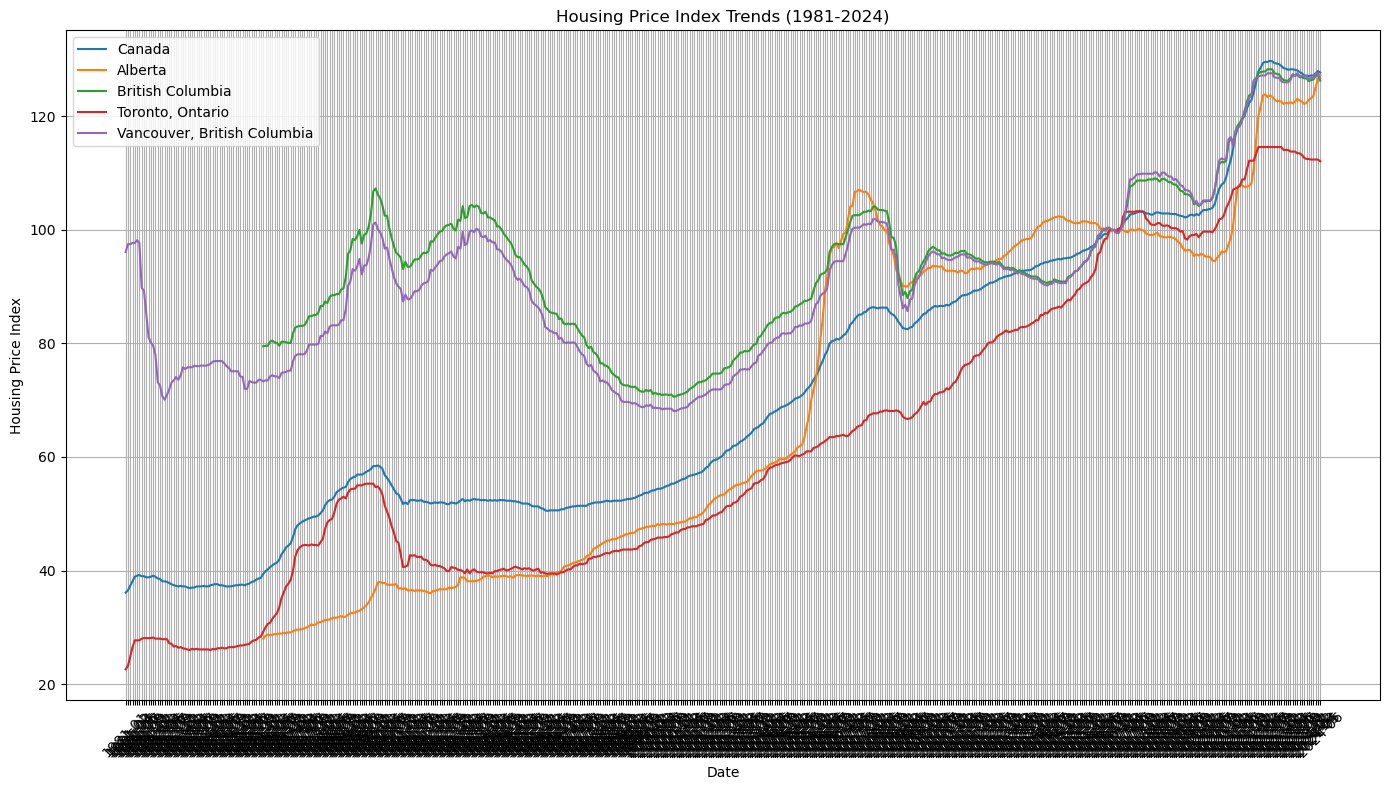

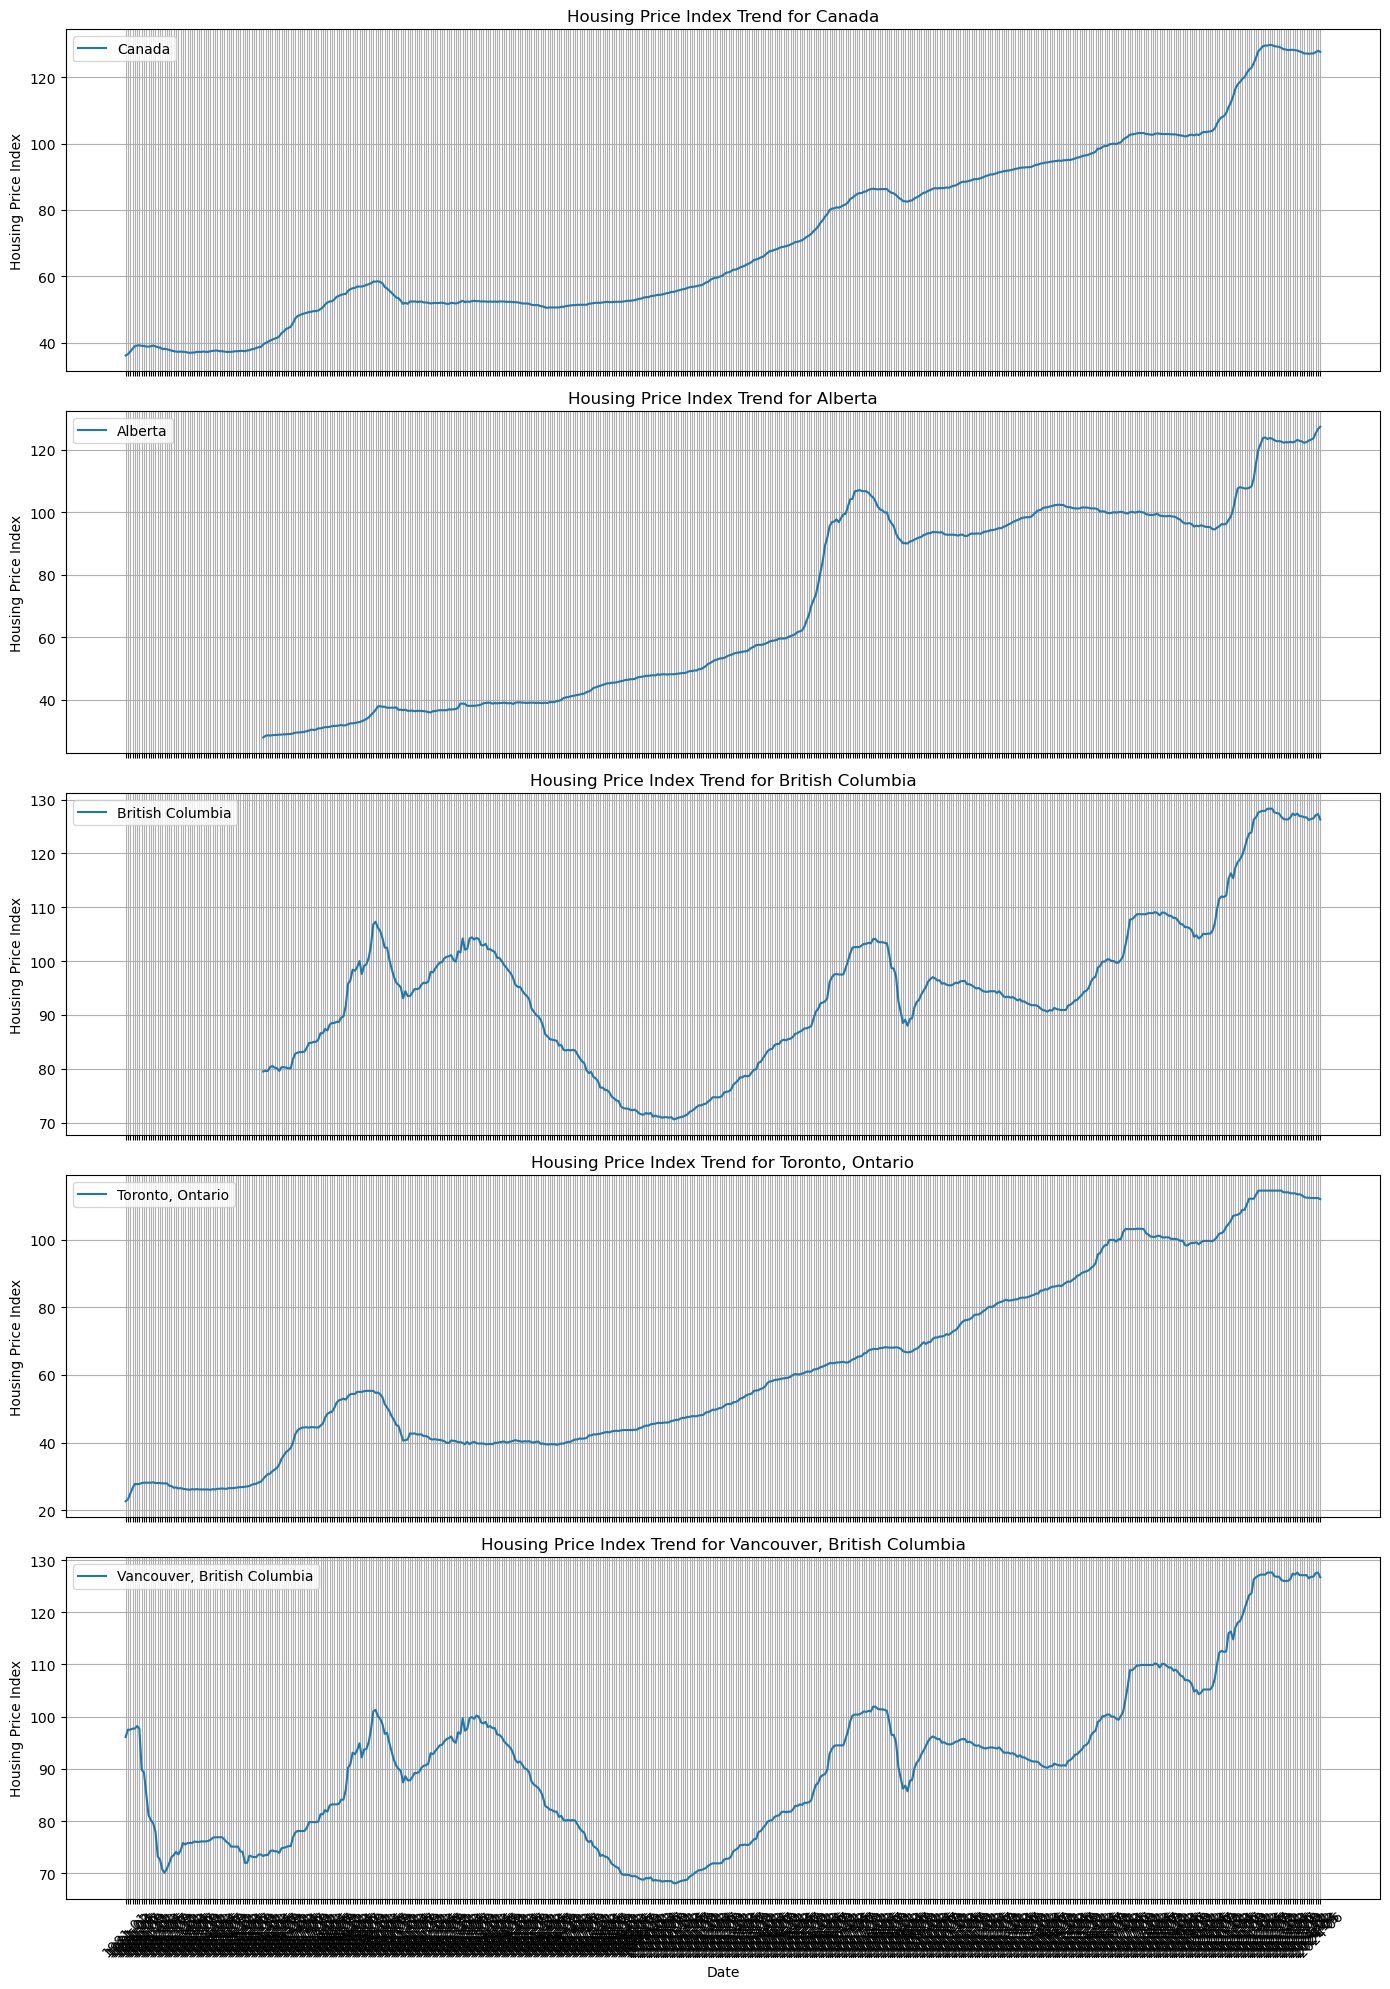

In [30]:
import matplotlib.pyplot as plt
# Plot the data for all selected geographies on a single plot
plt.figure(figsize=(14, 8))

for geo in geographies:
    plt.plot(transformed_df['Month-Year'].astype(str), transformed_df[geo], label=geo)

plt.xlabel('Date')
plt.ylabel('Housing Price Index')
plt.title('Housing Price Index Trends (1981-2024)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Separate plots for each region for clearer comparison
fig, axs = plt.subplots(len(geographies), 1, figsize=(14, 20), sharex=True)

for i, geo in enumerate(geographies):
    axs[i].plot(transformed_df['Month-Year'].astype(str), df_selected[geo], label=geo)
    axs[i].set_ylabel('Housing Price Index')
    axs[i].set_title(f'Housing Price Index Trend for {geo}')
    axs[i].legend()
    axs[i].grid(True)

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


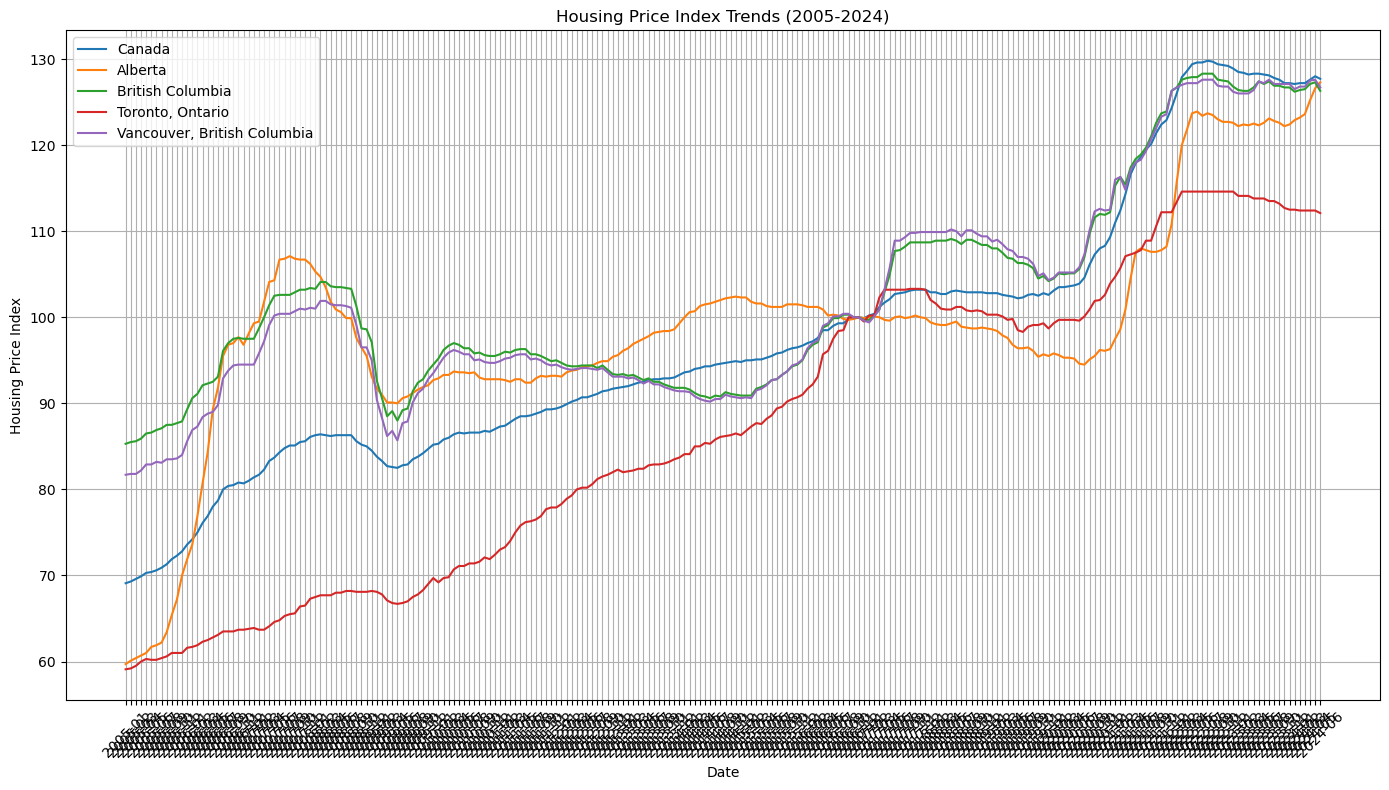

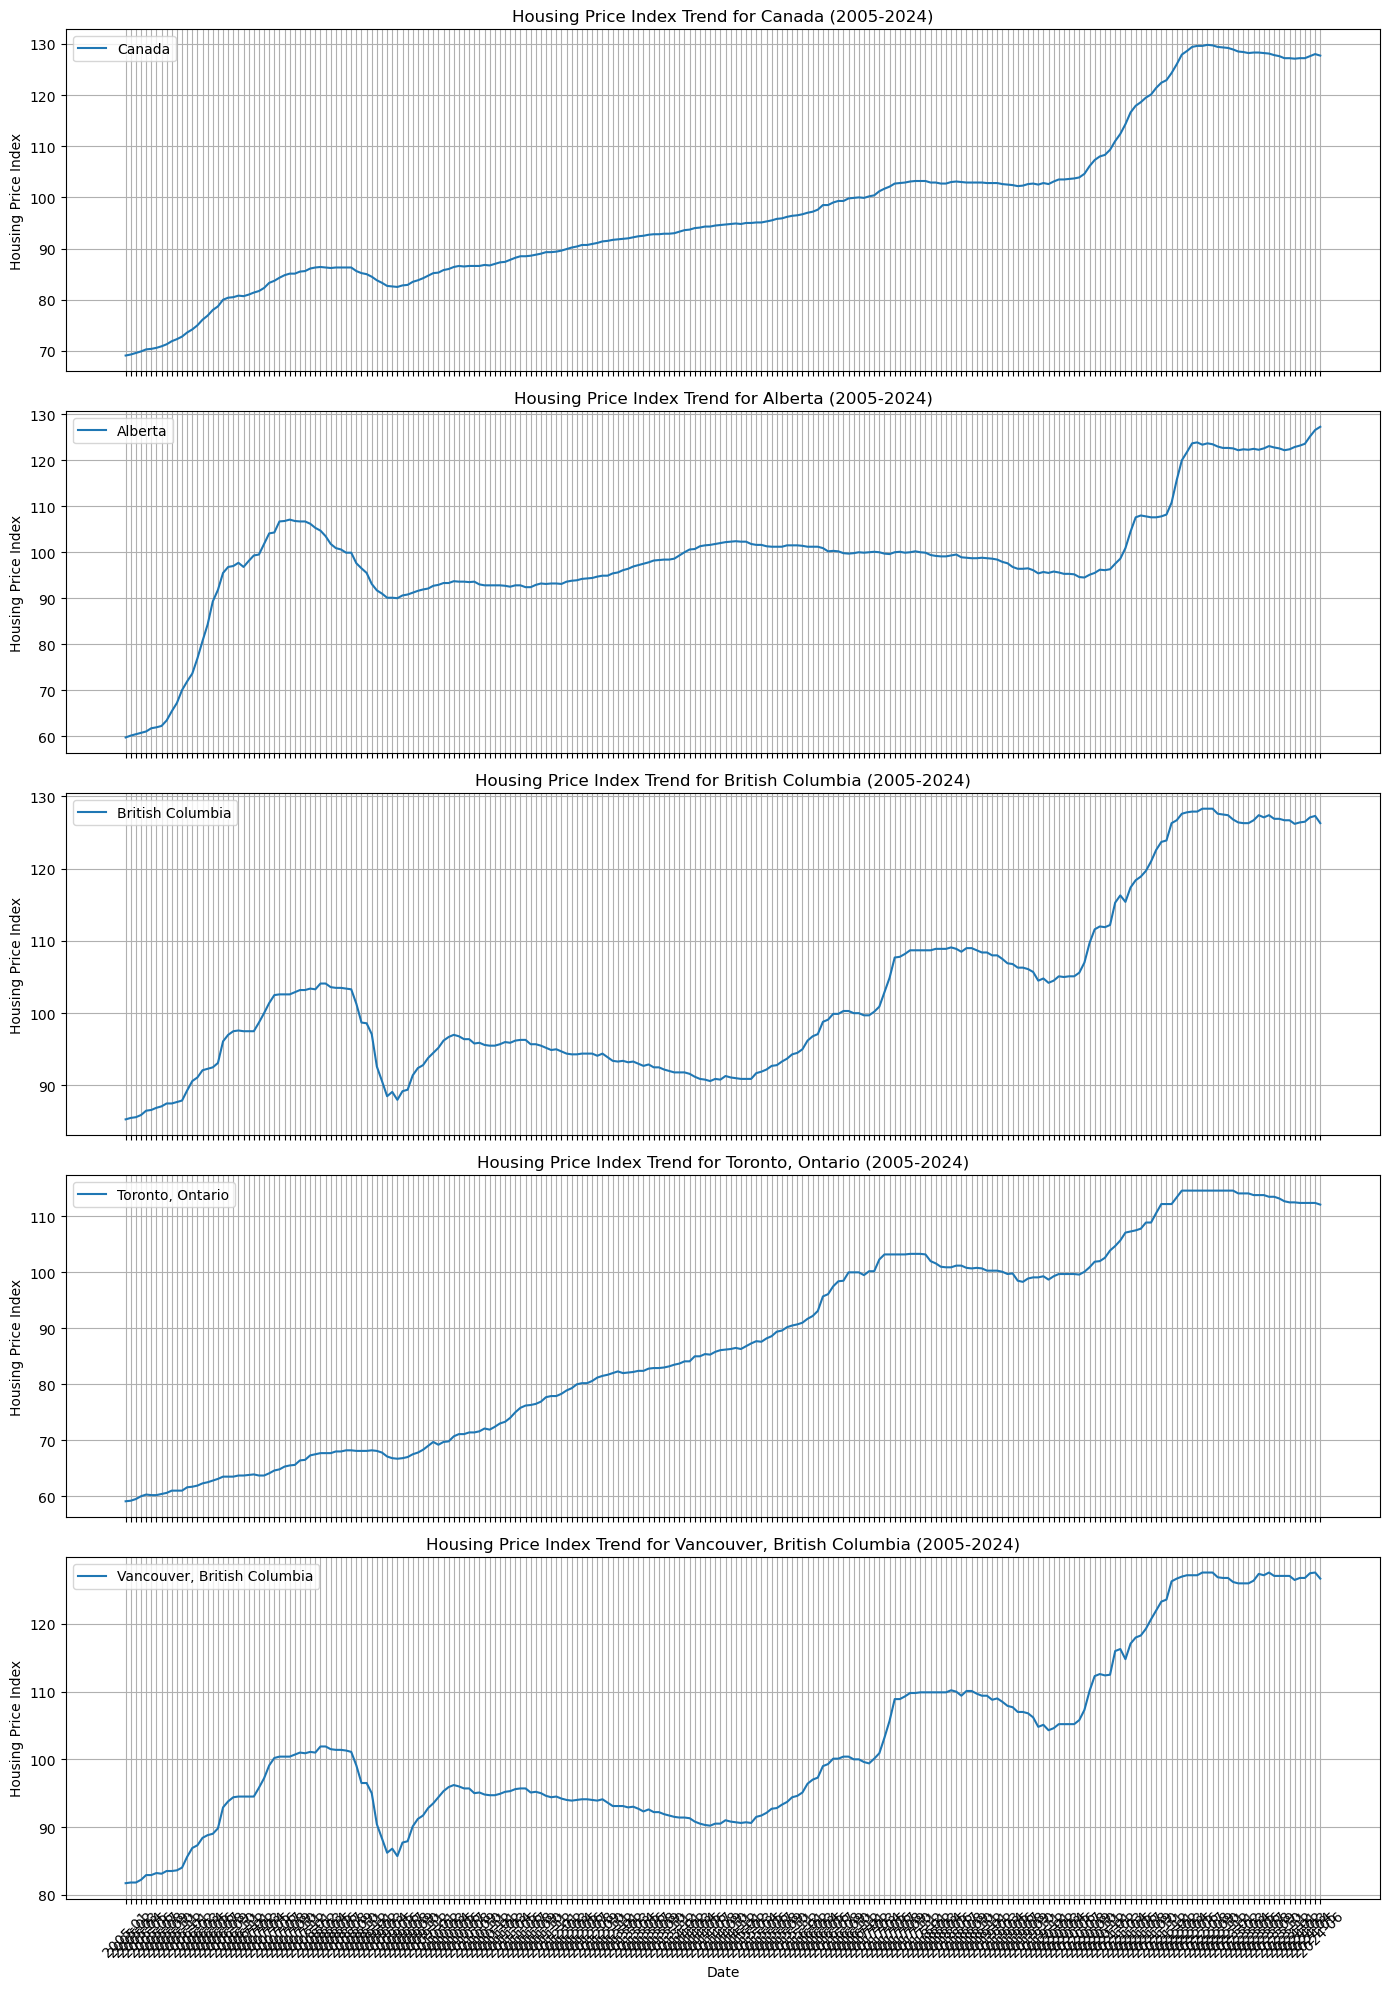

In [32]:
# Filter the DataFrame to include data from 2005 to 2024
df_filtered = transformed_df[(transformed_df['Month-Year'] >= '2005-01') & (transformed_df['Month-Year'] <= '2024-06')]

# Plot the data for all selected geographies on a single plot (2005-2024)
plt.figure(figsize=(14, 8))

for geo in geographies:
    plt.plot(df_filtered['Month-Year'].astype(str), df_filtered[geo], label=geo)

plt.xlabel('Date')
plt.ylabel('Housing Price Index')
plt.title('Housing Price Index Trends (2005-2024)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Separate plots for each region for clearer comparison (2005-2024)
fig, axs = plt.subplots(len(geographies), 1, figsize=(14, 20), sharex=True)

for i, geo in enumerate(geographies):
    axs[i].plot(df_filtered['Month-Year'].astype(str), df_filtered[geo], label=geo)
    axs[i].set_ylabel('Housing Price Index')
    axs[i].set_title(f'Housing Price Index Trend for {geo} (2005-2024)')
    axs[i].legend()
    axs[i].grid(True)

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


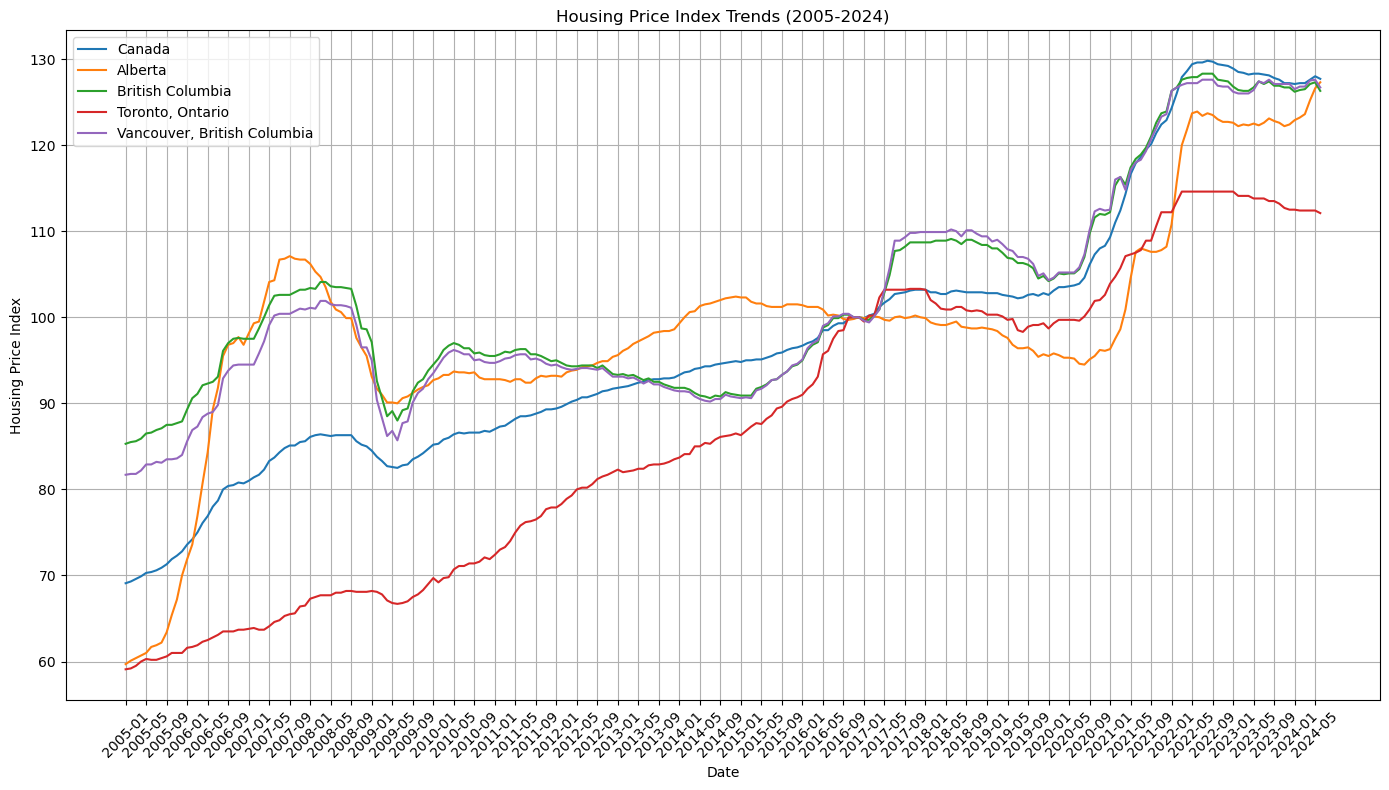

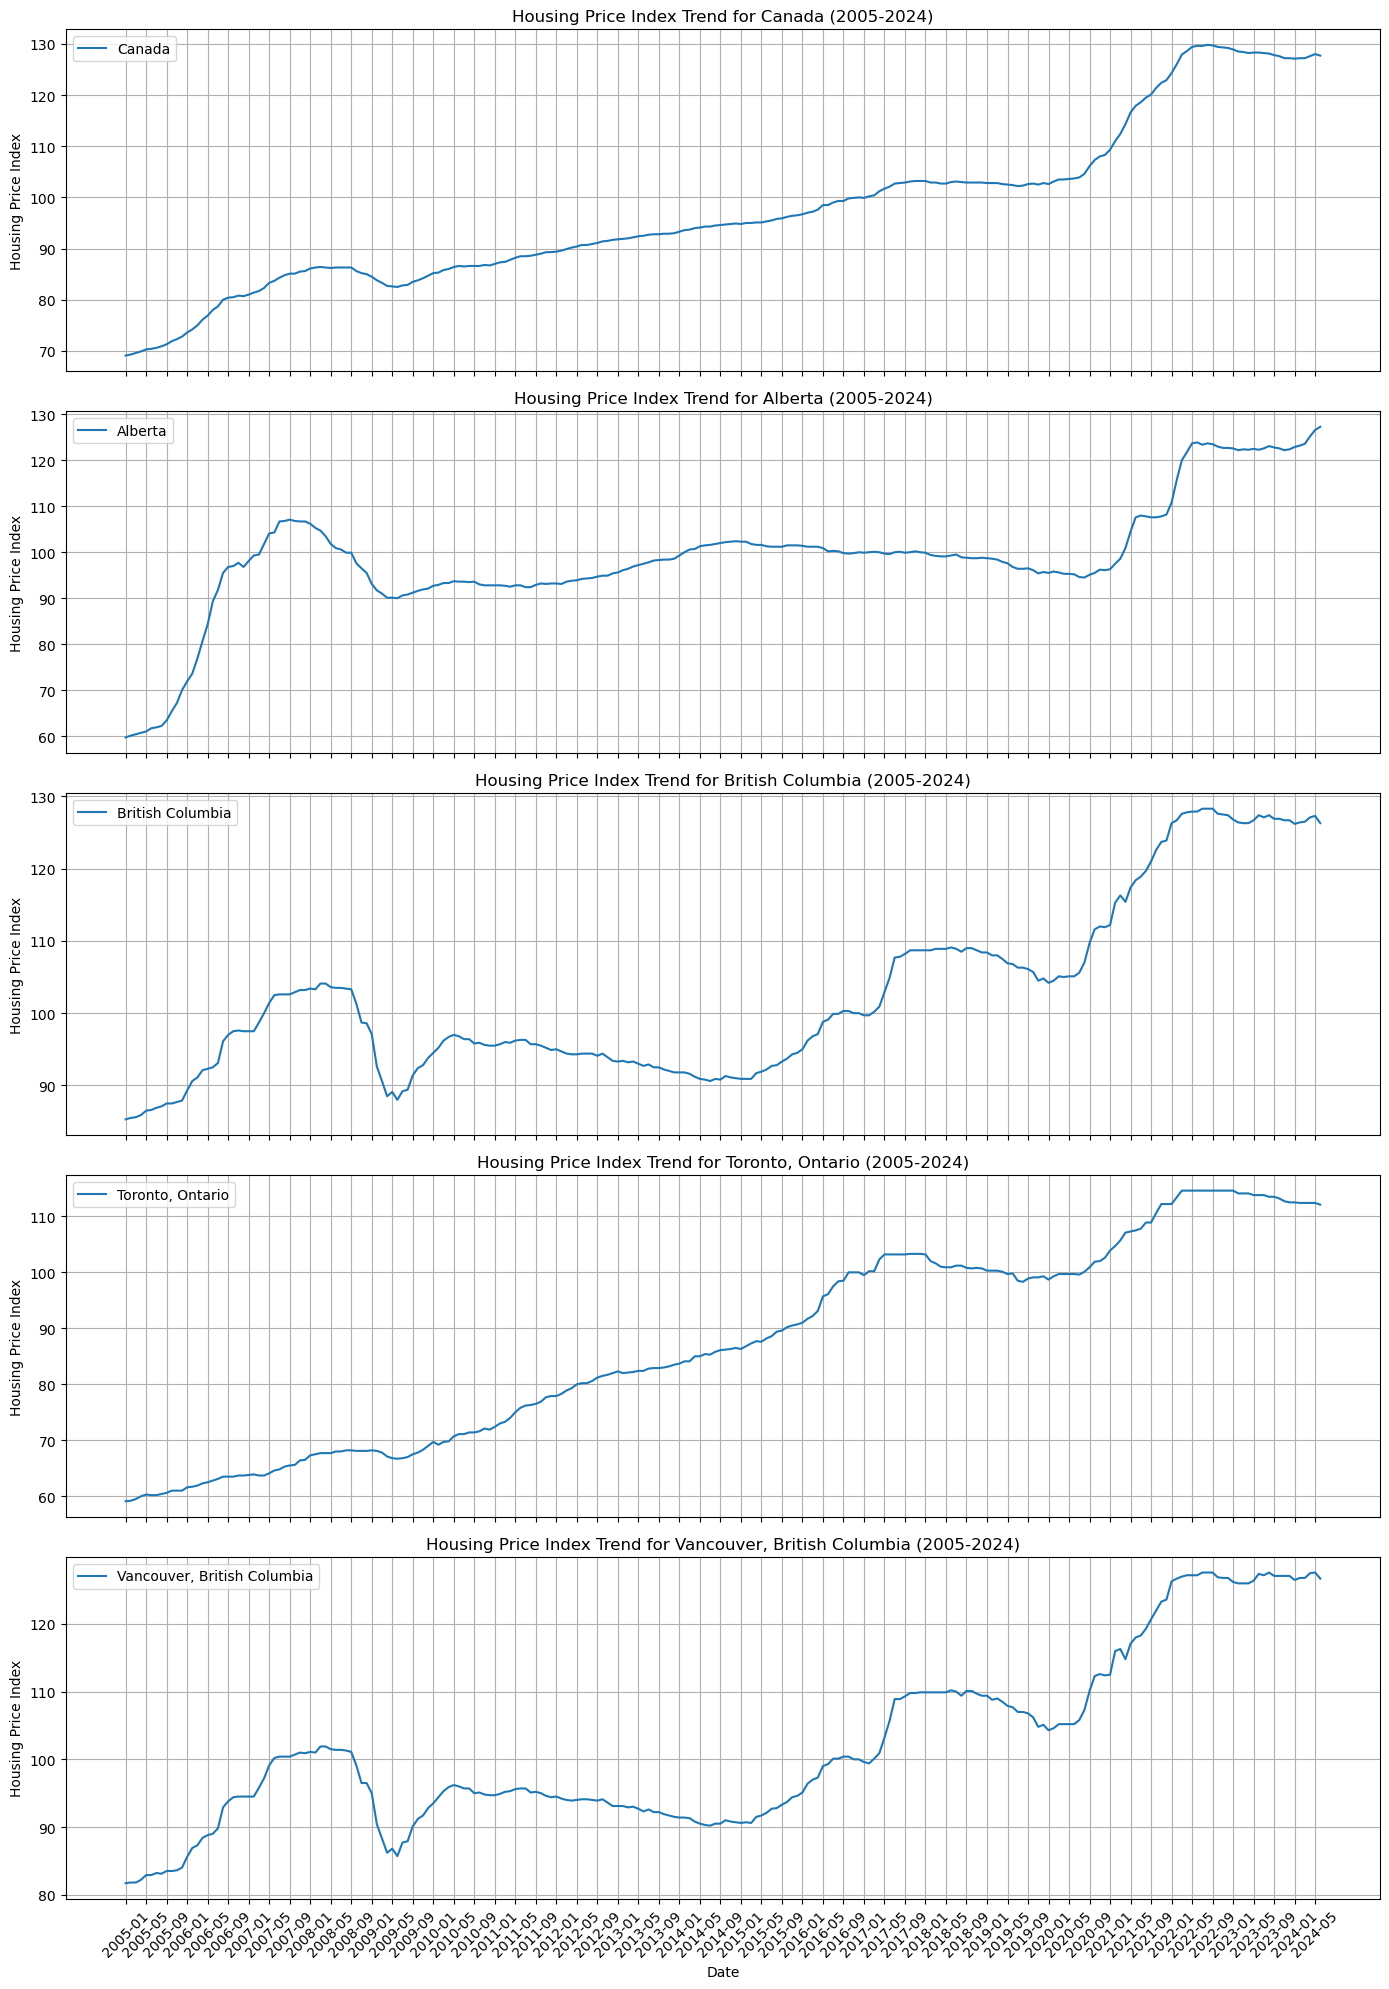

In [34]:
# Plot the data for all selected geographies on a single plot (2005-2024) with every 3rd date label
plt.figure(figsize=(14, 8))

for geo in geographies:
    plt.plot(df_filtered['Month-Year'].astype(str), df_filtered[geo], label=geo)

plt.xlabel('Date')
plt.ylabel('Housing Price Index')
plt.title('Housing Price Index Trends (2005-2024)')
plt.legend()
plt.xticks(ticks=range(0, len(df_filtered['Month-Year']), 4), labels=df_filtered['Month-Year'].astype(str)[::4], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Separate plots for each region for clearer comparison (2005-2024) with every 3rd date label
fig, axs = plt.subplots(len(geographies), 1, figsize=(14, 20), sharex=True)

for i, geo in enumerate(geographies):
    axs[i].plot(df_filtered['Month-Year'].astype(str), df_filtered[geo], label=geo)
    axs[i].set_ylabel('Housing Price Index')
    axs[i].set_title(f'Housing Price Index Trend for {geo} (2005-2024)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_xticks(range(0, len(df_filtered['Month-Year']), 4))
    axs[i].set_xticklabels(df_filtered['Month-Year'].astype(str)[::4], rotation=45)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


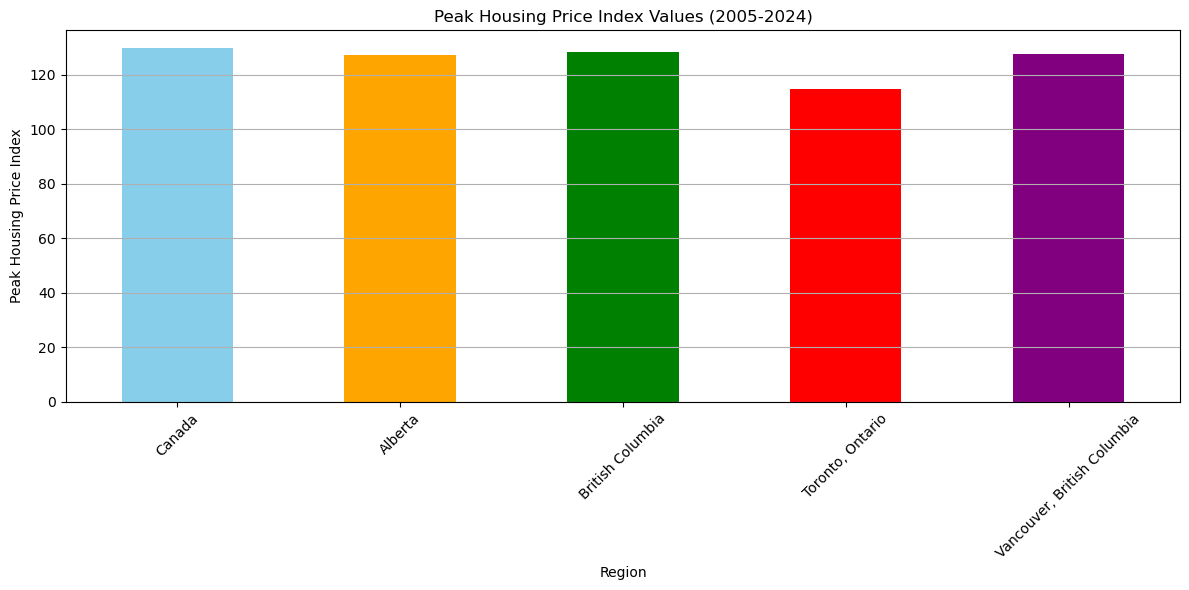

Canada                         129.8
Alberta                        127.3
British Columbia               128.3
Toronto, Ontario               114.6
Vancouver, British Columbia    127.6
dtype: float64

In [35]:
# Identify the peak values for each selected region
peak_values = df_filtered[geographies].max()

# Plot the peak values as a bar chart
plt.figure(figsize=(12, 6))
peak_values.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.xlabel('Region')
plt.ylabel('Peak Housing Price Index')
plt.title('Peak Housing Price Index Values (2005-2024)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Display the peak values
peak_values
